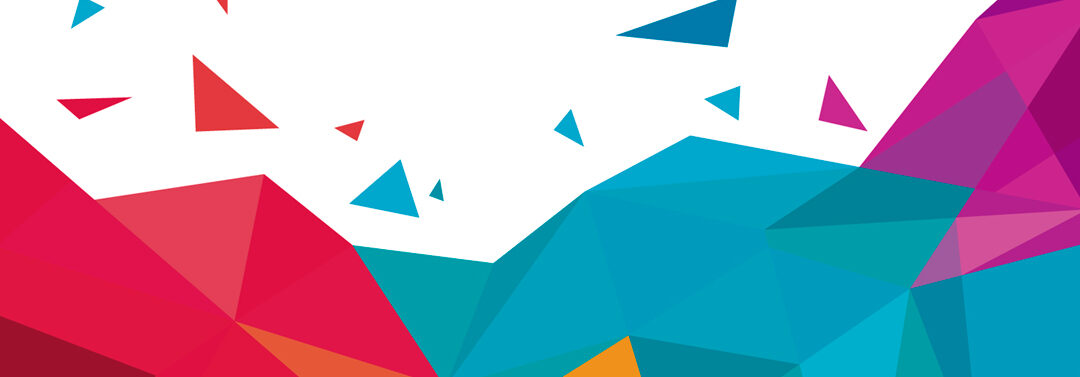

<center>
    
    
 ## Classifyng & Locating Geometric Elements on CNN
    
___

<center>

##### Pablo de la Asunción Cumbrera Conde

### Índice

 - Introducción
 
 - Librerías y DataSet
 - Data Preprocessing
 - Model Building
 - Evaluación & Conclusiones

#### Introducción
___

En este Notebook se trabaja la clasificación con Redes Neuronales Convolucionales de un Set de Datos 'X' e 'y' dados como np.arrays

Los objetivos son:
- Identificar y clasificar correctamente las figuras geométricas
- Localizar espacialmente las figuras geométricas

 #### Librerias y DataSet
 ___

In [1]:
import pickle
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
import torch as th
from pathlib import Path
from matplotlib import pyplot as plt
import visualkeras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import *

In [2]:
your_directory = Path('C:/Users/pablo.cumbrera/Documents/Data/Raw DATA/Geometric')
file = 'Geometric_Elements.pyc'
labels='Geometric_Elements_labels.pyc'

with open(your_directory/file,'rb') as f:
    X=pickle.load(f)
    print(f'This is X: \n\n {X}' "\n")

with open(your_directory/labels,'rb') as f:
    y=pickle.load(f)
    print(f'This is y: \n\n {y}')

This is X: 

 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.

In [3]:
print("X shape: ",X.shape)
print("y shape: ", y.shape)

X shape:  (3000, 56, 56)
y shape:  (3000, 2)


In [4]:
y_data = pd.DataFrame(y)
y_data.head()
y_data[0][0]

array([0.08283513, 0.07818838, 0.08283513, 1.07818838, 1.08283513,
       1.07818838, 1.08283513, 0.07818838])

In [5]:
y_data.columns = ['loc','labels']

In [6]:
y_data.head()

,loc,labels
0,"[0.08283513, 0.07818838, 0.08283513, 1.0781883...",[1]
1,"[0.44331814, 0.73571743, 0.44331814, 1.4857174...",[2]
2,"[0.20251281, 0.37490636, 0.20251281, 1.3749060...",[0]
3,"[0.11171338, 0.29153416, 0.11171338, 1.2915341...",[1]
4,"[0.45019937, 0.32350172, 0.45019937, 1.3235014...",[0]


In [7]:
X_train, X_test = train_test_split(X, shuffle=False)
y_train, y_test = train_test_split(y_data,shuffle=False)
print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (2250, 56, 56)
X test shape:  (750, 56, 56)
y train shape:  (2250, 2)
y test shape:  (750, 2)


In [8]:
y_train_box = np.array([i for i in y_train.values[:,0]])
y_train_cat = tf.keras.utils.to_categorical(np.array([i for i in y_train.values[:,1]]))
y_test_box = np.array([i for i in y_test.values[:,0]])
y_test_cat = tf.keras.utils.to_categorical(np.array([i for i in y_test.values[:,1]]))

#### Data Preprocessing 
___

- Exploración de imagenes 'X' asociadas a etiqueta 'y'

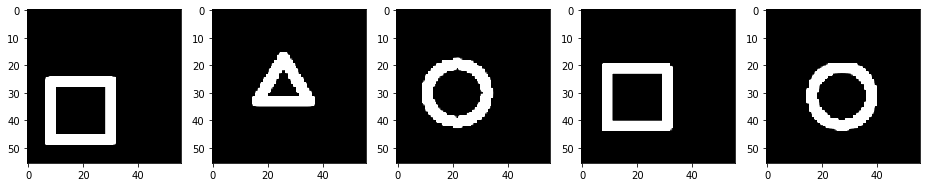

In [9]:
class_names = []

def plot_pics(Ximg):
    numero_imagenes = 5
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))
    for i in range(numero_imagenes):
        axs[i].imshow(tf.reshape(Ximg[i], [56, 56])*255,vmin=0, vmax=255,cmap='gray')

plot_pics(X)

3 Elementos
- Cuadrado
- Triángulo
- Círculo

In [10]:
print("Elemento: Cuadrado ", y_data['labels'][0],"\n")
print("Elemento: Triángulo ", y_data['labels'][1],"\n")
print("Elemento: Círculo ", y_data['labels'][2],"\n")
print("Elemento: Cuadrado ", y_data['labels'][3],"\n")
print("Elemento: Círculo ", y_data['labels'][4],"\n")

Elemento: Cuadrado  [1] 

Elemento: Triángulo  [2] 

Elemento: Círculo  [0] 

Elemento: Cuadrado  [1] 

Elemento: Círculo  [0] 



3 etiquetas asociadas a elementos
- Círculo: 0
- Cuadrado: 1
- Triángulo: 2

In [11]:
class_names = ["Círculo","Cuadrado","Triángulo"]
class_names
labels = {0:'Círculo',1:'Cuadrado',2:'Triángulo'}
type(labels)

dict

#### Exploratory Data Analysis
___

Comprobamos que las etiquetas para cada elemento son correctas

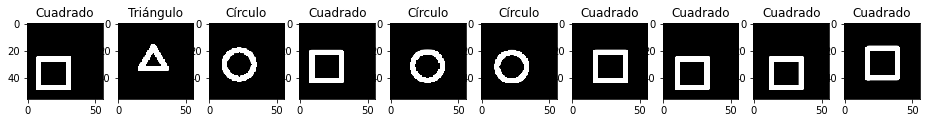

In [12]:
class_names = ["Círculo","Cuadrado","Triángulo"]

def plot_pics(Ximg, ylabel):
    numero_imagenes = 10
    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(16, 8))
    for i in range(numero_imagenes):
        axs[i].imshow(tf.reshape(Ximg[i], [56, 56])*255,vmin=0, vmax=255,cmap='gray')
        axs[i].title.set_text(str(class_names[int(ylabel.values[i])]))
        
plot_pics(X,y_data['labels'])

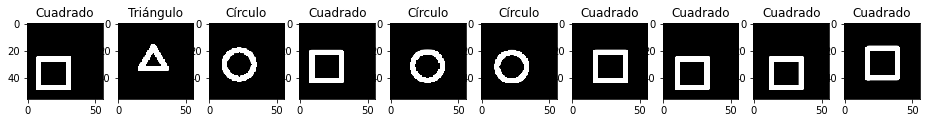

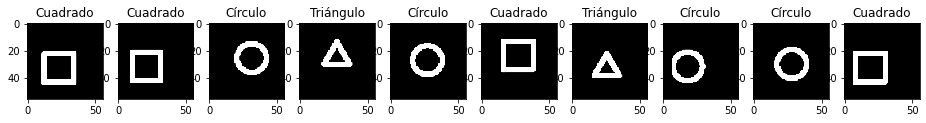

In [13]:
class_names = ["Círculo","Cuadrado","Triángulo"]

def plot_pics(Ximg, ylabel):
    numero_imagenes = 10
    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(16, 8))
    for i in range(numero_imagenes):
        axs[i].imshow(tf.reshape(Ximg[i], [56, 56])*255,vmin=0, vmax=255,cmap='gray')
        axs[i].title.set_text(str(class_names[int(ylabel.values[i])]))
        
plot_pics(X_train,y_train['labels'])
plot_pics(X_test,y_test['labels'])

In [14]:
X_train = np.array([i.reshape(56,56,1) for i in X_train])
X_test = np.array([i.reshape(56,56,1) for i in X_test])

In [15]:
print("Shape tensor de X_train: ", X_train.shape,"\n")
print("Shape tensor de X_test: ", X_test.shape)

Shape tensor de X_train:  (2250, 56, 56, 1) 

Shape tensor de X_test:  (750, 56, 56, 1)


In [16]:
#def token_create(arg):
   # return np.array([np.eye(1,size, int(i))[0] for i in arg.values])

#Creamos un token para cada Training y Test de Y

#size=3
#y_train_labels= token_create(y_train['labels'])
#y_test_labels = token_create(y_test['labels'])

In [17]:
#y_train_loc = th.tensor(y_train['loc'])
#y_test_loc = th.tensor(y_train['loc'])
#print(type(y_train_loc))
#print(type(y_test_loc))

#### Model Building
___

In [18]:
#Input Layer

model_input = Input(shape=(56,56,1))

#Block 1

x = Conv2D(filters=8, kernel_size=(2,2), strides=(2,2), activation='relu', padding= 'same')(model_input)
x = Conv2D(filters=8, kernel_size=(2,2), strides=(2,2), activation='relu', padding= 'same')(x)
           
#Block 5

flat = Flatten()(x)
y = Dense(300, activation='relu')(flat)
y = Dense(100, activation='relu')(y)

# Output Layer

output1 = Dense(3, activation='softmax')(y)
output2 = Dense(8,)(y)
outputs=[output1,output2]

model = Model(inputs = model_input, outputs = outputs)

print(model.summary())

# Compile the model

opt1 = keras.optimizers.Adam(learning_rate=0.002)
opt2 = keras.optimizers.RMSprop(learning_rate=0.002)

model.compile(optimizer=opt2,loss=['categorical_crossentropy','mse'], metrics=['accuracy'])

# Callback 

early_stopping = EarlyStopping(monitor='loss',patience=5)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 56, 56, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 8)    40          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 8)    264         conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 1568)         0           conv2d_1[0][0]                   
______________________________________________________________________________________________

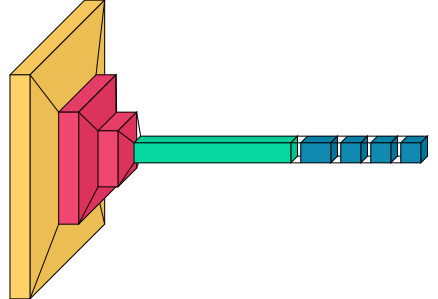

In [19]:
visualkeras.layered_view(model)

In [27]:
#Entremos el modelo
history = model.fit(X_train, [y_train_cat,y_train_box], epochs=50,callbacks=[early_stopping])

Epoch 1/50
71/71 [==============================] - 1s 9ms/step - loss: 0.0030 - dense_2_loss: 7.2656e-06 - dense_3_loss: 0.0029 - dense_2_accuracy: 1.0000 - dense_3_accuracy: 0.4862
Epoch 2/50
71/71 [==============================] - 1s 7ms/step - loss: 0.0027 - dense_2_loss: 8.2589e-06 - dense_3_loss: 0.0027 - dense_2_accuracy: 1.0000 - dense_3_accuracy: 0.4702
Epoch 3/50
71/71 [==============================] - 1s 7ms/step - loss: 0.0026 - dense_2_loss: 7.5550e-06 - dense_3_loss: 0.0026 - dense_2_accuracy: 1.0000 - dense_3_accuracy: 0.4867
Epoch 4/50
71/71 [==============================] - 1s 7ms/step - loss: 0.0026 - dense_2_loss: 5.0779e-06 - dense_3_loss: 0.0026 - dense_2_accuracy: 1.0000 - dense_3_accuracy: 0.4884
Epoch 5/50
71/71 [==============================] - 1s 10ms/step - loss: 0.0024 - dense_2_loss: 5.0477e-06 - dense_3_loss: 0.0024 - dense_2_accuracy: 1.0000 - dense_3_accuracy: 0.4853
Epoch 6/50
71/71 [==============================] - 1s 9ms/step - loss: 0.0025 - den

In [28]:
#accuracy= model.evaluate(X_test ,[y_test_cat,yn_train_box])
#print ('Model accuracy:' ,accuracy*100, '%')
preds = model.predict(X_test)
print(f'Predicted Values para ELEMENTOS\n\n {preds[0][:3]}\n\nReal Values para ELEMENTOS\n\n {y_test_cat[:3]}\n\n')
print(f'Predicted Values para LOCALIZACION\n\n {preds[1][:3]}\n\nReal Values para LOCALIZACION\n\n {y_test_box[:3]}')

Predicted Values para ELEMENTOS

 [[4.5513005e-08 1.0000000e+00 4.2069090e-10]
 [6.7167667e-07 9.9999893e-01 2.9842849e-07]
 [9.9999774e-01 2.2734512e-06 4.0574395e-08]]

Real Values para ELEMENTOS

 [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


Predicted Values para LOCALIZACION

 [[0.27243719 0.24684115 0.27271378 1.2672071  1.2859747  1.2682313
  1.2854664  0.24688779]
 [0.12800676 0.26782715 0.12886131 1.2785552  1.1375482  1.2806842
  1.1369749  0.2678957 ]
 [0.6543788  0.6225803  0.65468943 1.6168582  1.6508658  1.6156328
  1.6514202  0.6226222 ]]

Real Values para LOCALIZACION

 [[0.27286373 0.24494664 0.27286373 1.24494664 1.27286373 1.24494664
  1.27286373 0.24494664]
 [0.1417609  0.28551696 0.1417609  1.28551696 1.1417609  1.28551696
  1.1417609  0.28551696]
 [0.62707206 0.59685115 0.62707206 1.59685084 1.62707144 1.59685084
  1.62707144 0.59685115]]


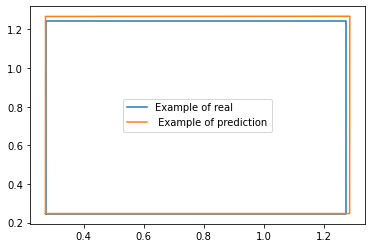

In [29]:
a = np.array(y_test_box[0])
a_r = a.reshape(4,2)
a_r = np.concatenate((a_r,a_r[:1]),axis = 0)
b = preds[1][0]

b_r =b.reshape(4,2)
b_r = np.concatenate((b_r,b_r[:1]),axis = 0)

f = plt.figure()
a = f.add_subplot(111)
a.plot(a_r[:,0],a_r[:,1],label='Example of real')
a.plot(b_r[:,0],b_r[:,1],label= ' Example of prediction')
a.legend()


#### Evaluación & Conclusiones
___

- Evaluación CATEGORÍA

In [30]:
numero_predicciones=10
for i in range (numero_predicciones):
    print(" 0 Círculo 1 Cuadrado 2 Triángulo")
    print(preds[0][i])
    print(y_test_cat[i])
    print (" \n ")

 0 Círculo 1 Cuadrado 2 Triángulo
[4.5513005e-08 1.0000000e+00 4.2069090e-10]
[0. 1. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[6.716767e-07 9.999989e-01 2.984285e-07]
[0. 1. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[9.9999774e-01 2.2734512e-06 4.0574395e-08]
[1. 0. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[2.2564572e-17 4.9930170e-14 1.0000000e+00]
[0. 0. 1.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[9.9999952e-01 2.3124026e-07 2.1719782e-07]
[1. 0. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[3.7930001e-06 9.9999619e-01 1.7345729e-13]
[0. 1. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[1.5350662e-07 2.0383467e-07 9.9999964e-01]
[0. 0. 1.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[9.9999917e-01 8.3946725e-07 6.6242296e-09]
[1. 0. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[9.9999666e-01 3.2227038e-06 1.0715558e-07]
[1. 0. 0.]
 
 
 0 Círculo 1 Cuadrado 2 Triángulo
[3.6650233e-06 9.9999630e-01 1.3379486e-08]
[0. 1. 0.]
 
 


- Evaluación Coordenadas

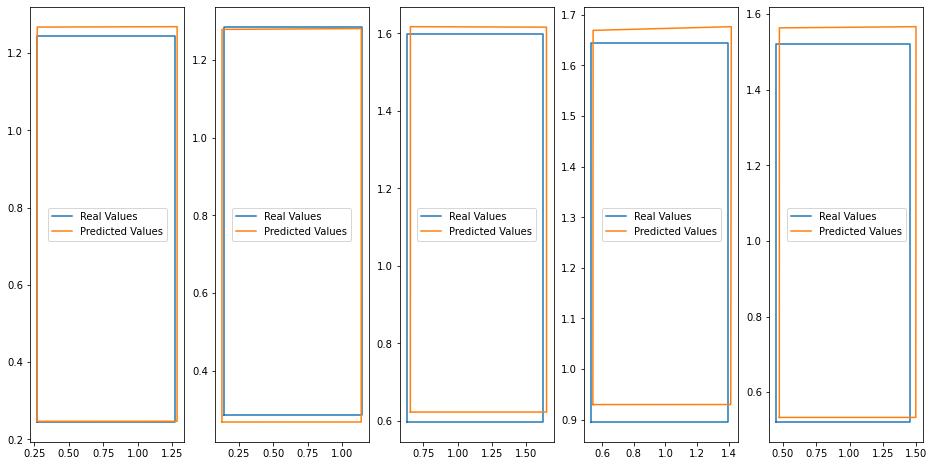

In [31]:
numero_preds=5

fig, axs = plt.subplots(nrows=1, ncols=numero_preds, figsize=(16, 8))

for i in range(numero_preds):

    a = y_test_box[i]
    a_r = a.reshape(4,2)
    a_r = np.concatenate((a_r,a_r[:1]),axis = 0)

    b = preds[1][i]
    b_r =b.reshape(4,2)
    b_r = np.concatenate((b_r,b_r[:1]),axis = 0)

    axs[i].plot(a_r[:,0],a_r[:,1],label='Real Values')
    axs[i].plot(b_r[:,0],b_r[:,1],label= 'Predicted Values')
    axs[i].legend()

    
plt.show()

In [32]:
numero_predicciones=10
for i in range (numero_predicciones):
    print([i])
    print(preds[1][i])
    print("\n")
    print(y_test_box[i])
    print (" \n \n")

[0]
[0.27243719 0.24684115 0.27271378 1.2672071  1.2859747  1.2682313
 1.2854664  0.24688779]


[0.27286373 0.24494664 0.27286373 1.24494664 1.27286373 1.24494664
 1.27286373 0.24494664]
 
 

[1]
[0.12800676 0.26782715 0.12886131 1.2785552  1.1375482  1.2806842
 1.1369749  0.2678957 ]


[0.1417609  0.28551696 0.1417609  1.28551696 1.1417609  1.28551696
 1.1417609  0.28551696]
 
 

[2]
[0.6543788  0.6225803  0.65468943 1.6168582  1.6508658  1.6156328
 1.6514202  0.6226222 ]


[0.62707206 0.59685115 0.62707206 1.59685084 1.62707144 1.59685084
 1.62707144 0.59685115]
 
 

[3]
[0.5409473  0.9297669  0.54231113 1.6694024  1.4159157  1.6766641
 1.4124854  0.9298425 ]


[0.53125967 0.89522596 0.53125967 1.64522596 1.39728508 1.64522596
 1.39728508 0.89522596]
 
 

[4]
[0.47423443 0.5330367  0.47489604 1.5638207  1.4972789  1.5669649
 1.4956738  0.5330636 ]


[0.44999481 0.52084356 0.44999481 1.52084325 1.44999419 1.52084325
 1.44999419 0.52084356]
 
 

[5]
[0.43606806 0.6855854  0.43639103 1.

In [33]:
##################